In [1]:
import sys
import csv
from scipy import stats
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%pylab inline

Populating the interactive namespace from numpy and matplotlib


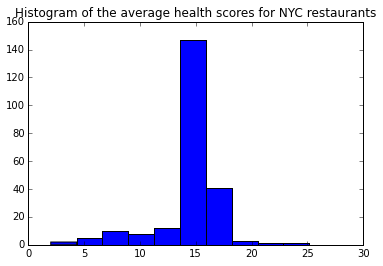

In [2]:
data = pd.read_csv('data_result/Merged.csv')
plt.hist(data.avg_score,10)
plt.title('Histogram of the average health scores for NYC restaurants')

(array([  1.,   0.,   1.,   1.,   3.,   4.,  27.,  79.,  56.,  10.]),
 array([  6.        ,   7.18095238,   8.36190476,   9.54285714,
         10.72380952,  11.9047619 ,  13.08571429,  14.26666667,
         15.44761905,  16.62857143,  17.80952381]),
 <a list of 10 Patch objects>)

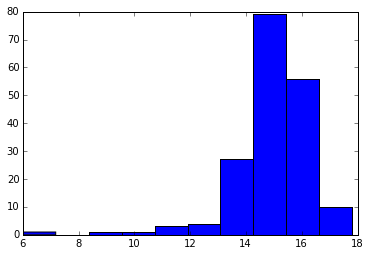

In [3]:
data = data[data['num_restaurants']>10]
data.drop(['Unnamed: 0'], axis=1, inplace=True)
plt.hist(data.avg_score,10)

In [4]:
components = ['bar_score', 'bar_revcount', 'rest_score',
       'rest_revcount', 'num_complaints', 'num_food_est', 'num_food_poi',
       'num_smoking', 'num_restaurants', 'num_violations',
       'num_Cviolations', 'num_amer', 'num_chi', 'num_jap', 'num_cafe',
       'num_ita', 'num_latin', 'num_mex', 'num_pizza', 'num_span']
X = np.array(data[components])
pca = PCA(n_components=8, whiten=True).fit(X)
X_pca = pca.transform(X)

In [5]:
lmData=pd.DataFrame(columns=['P1','P2','P3','P4','P5','P6','P7','P8'])
i = 0
for col in lmData.columns:
    lmData[col] = X_pca[:,i]
    i += 1
lmData['Y'] = data['avg_score'].tolist()
lmData = lmData.reindex(np.random.permutation(lmData.index))
train = lmData[0:120]
valid = lmData[121::]
lm_pca = smf.ols(formula='Y ~ P1+P2+P3+P4+P5+P6+P7+P8',data=train).fit()
lm_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     7.464
Date:                Sun, 15 Nov 2015   Prob (F-statistic):           6.32e-08
Time:                        21:36:00   Log-Likelihood:                -181.73
No. Observations:                 120   AIC:                             381.5
Df Residuals:                     111   BIC:                             406.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     14.9667      0.107    140.512      0.000        14.756    15.178
P1             0.3810      0.112      3.414      0.001         0.160     0.602
P2             0.4861      0.100      4.840      0.000         0.287     0.685
P3            -0.0375      0.109     -0.344      0.731        -0.253     0.178
P4            -0.2872      0.095     -3.027      0.003        -0.475    -0.099
P5             0.0058      0.106      0.055      0.957        -0.205     0.217
P6             0.0224      0.208      0.108      0.914        -0.389     0.434
P7             0.2555      0.124      2.060      0.042         0.010     0.501
P8             0.1443      0.116      1.244      0.216        -0.086     0.374
==============================================================================
Omnibus:                       26.757   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.627
Skew:                          -0.774   Prob(JB):                     3.78e-17
Kurtosis:                       6.568   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
r2=[lm_pca.rsquared]
lmy2 = lm_pca.predict(valid)
R2v=1-sum(pow(lmy2-valid.Y,2))/sum(pow(valid.Y-mean(valid.Y),2))
print('Validation R2={0}'.format(R2v))

Validation R2=0.154560455592


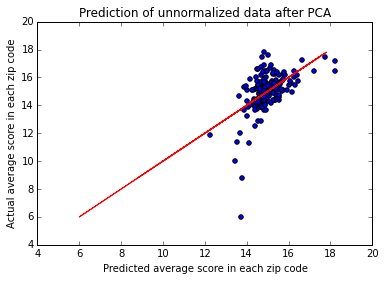

In [7]:
plt.scatter(lm_pca.predict(lmData),lmData.Y)
plt.plot(lmData.Y,lmData.Y,'r')
plt.title('Prediction of unnormalized data after PCA')
plt.xlabel('Predicted average score in each zip code')
plt.ylabel('Actual average score in each zip code')

In [8]:
normlist = ['num_complaints', 'num_food_est', 'num_food_poi','num_smoking', 'num_violations','num_Cviolations', 
            'num_amer', 'num_chi', 'num_jap', 'num_cafe','num_ita', 'num_latin', 'num_mex', 'num_pizza', 'num_span']

In [9]:
for i in normlist:
    data[i] = data[i]/data['num_restaurants']
X = np.array(data[components])
pca = PCA(n_components=8, whiten=True).fit(X)
X_pca = pca.transform(X)

In [10]:
lmData=pd.DataFrame(columns=['P1','P2','P3','P4','P5','P6','P7','P8'])
i = 0
for col in lmData.columns:
    lmData[col] = X_pca[:,i]
    i += 1
lmData['zip'] = data['zip'].tolist()
lmData['Y'] = data['avg_score'].tolist()
lmData = lmData.reindex(np.random.permutation(lmData.index))
train = lmData[0:120]
valid = lmData[121::]
lm_pca = smf.ols(formula='Y ~ P1+P2+P3+P4+P5+P6+P7+P8',data=lmData).fit()
lm_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     63.86
Date:                Sun, 15 Nov 2015   Prob (F-statistic):           1.13e-47
Time:                        21:36:04   Log-Likelihood:                -192.86
No. Observations:                 182   AIC:                             403.7
Df Residuals:                     173   BIC:                             432.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     14.9927      0.053    282.438      0.000        14.888    15.097
P1             0.0282      0.053      0.531      0.596        -0.077     0.133
P2            -0.4697      0.053     -8.848      0.000        -0.574    -0.365
P3             0.1959      0.053      3.691      0.000         0.091     0.301
P4             1.0629      0.053     20.023      0.000         0.958     1.168
P5             0.1369      0.053      2.579      0.011         0.032     0.242
P6             0.1619      0.053      3.050      0.003         0.057     0.267
P7             0.0574      0.053      1.081      0.281        -0.047     0.162
P8             0.0421      0.053      0.794      0.428        -0.063     0.147
==============================================================================
Omnibus:                        7.746   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               14.091
Skew:                           0.058   Prob(JB):                     0.000871
Kurtosis:                       4.358   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
r2=[lm_pca.rsquared]
lmy2 = lm_pca.predict(valid)
R2v=1-sum(pow(lmy2-valid.Y,2))/sum(pow(valid.Y-mean(valid.Y),2))
print('Validation R2={0}'.format(R2v))

Validation R2=0.857285103309


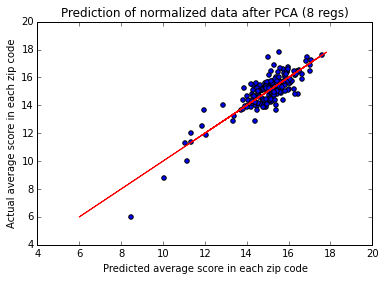

In [12]:
plt.scatter(lm_pca.predict(lmData),lmData.Y)
plt.plot(lmData.Y,lmData.Y,'r')
plt.title('Prediction of normalized data after PCA (8 regs)')
plt.xlabel('Predicted average score in each zip code')
plt.ylabel('Actual average score in each zip code')

In [13]:
lm_pca = smf.ols(formula='Y ~ P2+P3+P4+P5+P6',data=lmData).fit()
lm_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     102.3
Date:                Sun, 15 Nov 2015   Prob (F-statistic):           3.47e-50
Time:                        21:36:08   Log-Likelihood:                -193.95
No. Observations:                 182   AIC:                             399.9
Df Residuals:                     176   BIC:                             419.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     14.9927      0.053    283.179      0.000        14.888    15.097
P2            -0.4697      0.053     -8.871      0.000        -0.574    -0.365
P3             0.1959      0.053      3.701      0.000         0.091     0.300
P4             1.0629      0.053     20.075      0.000         0.958     1.167
P5             0.1369      0.053      2.585      0.011         0.032     0.241
P6             0.1619      0.053      3.058      0.003         0.057     0.266
==============================================================================
Omnibus:                        7.406   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.025   Jarque-Bera (JB):               12.945
Skew:                           0.073   Prob(JB):                      0.00155
Kurtosis:                       4.298   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
r2=[lm_pca.rsquared]
lmy2 = lm_pca.predict(valid)
R2v=1-sum(pow(lmy2-valid.Y,2))/sum(pow(valid.Y-mean(valid.Y),2))
print('Validation R2={0}'.format(R2v))

Validation R2=0.860223281653


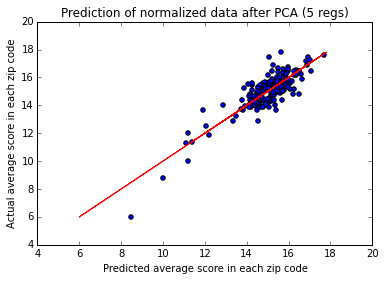

In [15]:
plt.scatter(lm_pca.predict(lmData),lmData.Y)
plt.plot(lmData.Y,lmData.Y,'r')
plt.title('Prediction of normalized data after PCA (5 regs)')
plt.xlabel('Predicted average score in each zip code')
plt.ylabel('Actual average score in each zip code')

In [16]:
lmData['Predicts'] = lm_pca.predict(lmData)
lmData['Dev_SqDist'] = (lm_pca.predict(lmData)-lmData.Y)**2
lmData.head()

,P1,P2,P3,P4,P5,P6,P7,P8,zip,Y,Predicts,Dev_SqDist
7,-1.843991,0.275137,-4.400989,1.008205,-0.149342,-1.690632,0.277857,-0.053619,10009,15.105769,14.778624,0.107024
68,0.667417,0.059085,0.728879,-1.310939,0.061467,-2.252692,-0.286485,-0.353374,10460,12.876676,13.358075,0.231745
33,-3.158710,-1.944425,-0.092736,-0.758138,0.120075,-0.328486,-1.238444,0.073701,10036,15.190687,15.045239,0.021155
34,0.439290,0.827642,-0.360472,1.126017,1.343299,-1.060975,-0.138954,-0.432108,10037,16.600000,15.742263,0.735712
172,0.431378,-0.762753,0.681128,-1.829112,-2.122536,1.399070,-1.868214,0.013655,11430,13.225490,13.476287,0.062899


In [17]:
lmData.to_csv('data_result/regression.csv')

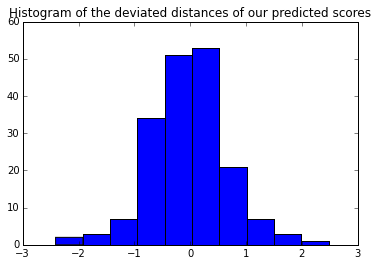

In [18]:
plt.hist(lmData.Predicts-lmData.Y,10)
plt.title('Histogram of the deviated distances of our predicted scores')